# Preprocessing

In [1]:
import os
import time
import sklearn
import pickle
import pydot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torch.autograd import Variable

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from helpers import*

Using TensorFlow backend.


In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
data = build_spectrum (df,do_spectrum = True ,spect = 0.5)

## Version 1

In [3]:
df2 = pd.get_dummies(df, columns=['job','marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
print(df2.shape)

(41188, 64)


In [9]:
df2['y'] = df2['y'].astype('category')

## Version 2

In [4]:
df3 = df.copy()

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
df3.job = le.fit_transform(df3.job)
df3.marital = le.fit_transform(df3.marital)
df3.education = le.fit_transform(df3.education)
df3.default = le.fit_transform(df3.default)
df3.housing = le.fit_transform(df3.housing)
df3.loan = le.fit_transform(df3.loan)
df3.contact = le.fit_transform(df3.contact)
df3.month = le.fit_transform(df3.month)
df3.day_of_week = le.fit_transform(df3.day_of_week)
df3.poutcome = le.fit_transform(df3.poutcome)

In [8]:
df3['y'] = df3.y.map(dict(yes=1, no=0))

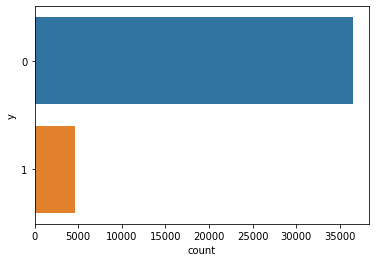

In [23]:
sns.countplot(y='y', data=df3);

In [24]:
df3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
X = df3.iloc[:,0:19]
y = df3.iloc[:,20]

# SKLEARN

In [26]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [27]:
x_train.shape, y_train.shape

((32950, 19), (32950,))

In [29]:
x_test.shape, y_test.shape

((8238, 19), (8238,))

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=19, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None


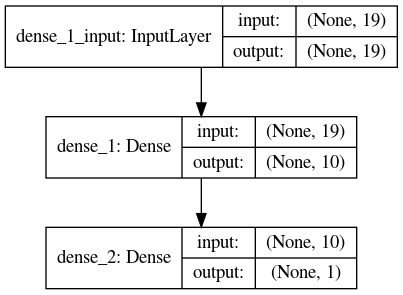

In [32]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [43]:
x_train_keras = np.array(X)
y_train_keras = np.array(y)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

Train on 32950 samples, validate on 8238 samples
Epoch 1/20
32950/32950 [==============================] - 0s 13us/step - loss: 0.1664 - accuracy: 0.9357 - val_loss: 0.6665 - val_accuracy: 0.6888
Epoch 2/20
32950/32950 [==============================] - 0s 13us/step - loss: 0.1646 - accuracy: 0.9357 - val_loss: 0.7573 - val_accuracy: 0.6888
Epoch 3/20
32950/32950 [==============================] - 0s 15us/step - loss: 0.1657 - accuracy: 0.9357 - val_loss: 0.6950 - val_accuracy: 0.6894
Epoch 4/20
32950/32950 [==============================] - 1s 17us/step - loss: 0.1667 - accuracy: 0.9358 - val_loss: 0.6533 - val_accuracy: 0.6895
Epoch 5/20
32950/32950 [==============================] - 0s 13us/step - loss: 0.1663 - accuracy: 0.9360 - val_loss: 0.7476 - val_accuracy: 0.6902
Epoch 6/20
32950/32950 [==============================] - 0s 15us/step - loss: 0.1667 - accuracy: 0.9361 - val_loss: 0.7272 - val_accuracy: 0.6902
Epoch 7/20
32950/32950 [==============================] - 1s 21us/ste

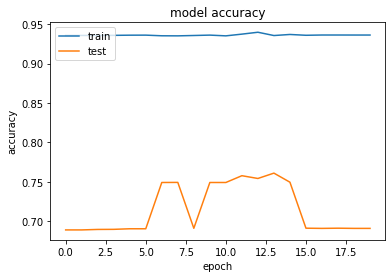

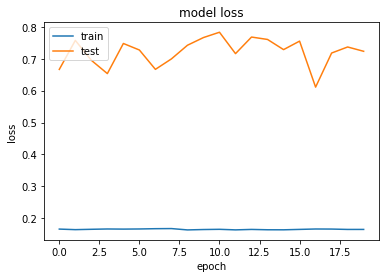

In [16]:
build_plot_loss_accuracy(X, y, model, epochs = 20)

In [39]:
history.history['accuracy']


[0.89799696,
 0.8981184,
 0.8981184,
 0.8979666,
 0.89805764,
 0.89790595,
 0.8979363,
 0.8979363,
 0.8979666,
 0.89823973]

In [36]:
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n final accuracy: %.2f%%" % (scores[1]*100))

8238/8238 [==============================] - 0s 26us/step

 final accuracy: 89.85%


# Benchmarking

In [35]:
list_optimzers = ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam']

In [38]:
for l in list_optimzers:
    model.compile(loss='binary_crossentropy', optimizer=l, metrics=['accuracy'])
    model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True, verbose=0)
    scores = model.evaluate(np.array(x_test), np.array(y_test))
    print("\n final accuracy for %s optimizer:  %.2f%%" % (l,scores[1]*100))

8238/8238 [==============================] - 0s 22us/step

 final accuracy for adam optimizer:  90.47%
8238/8238 [==============================] - 0s 18us/step

 final accuracy for sgd optimizer:  89.78%
8238/8238 [==============================] - 0s 21us/step

 final accuracy for RMSprop optimizer:  90.84%
8238/8238 [==============================] - 0s 19us/step

 final accuracy for Adagrad optimizer:  90.98%
8238/8238 [==============================] - 0s 19us/step

 final accuracy for Adamax optimizer:  90.99%
8238/8238 [==============================] - 0s 18us/step

 final accuracy for Nadam optimizer:  90.88%


In [39]:
from keras_radam import RAdam

model.compile(loss='binary_crossentropy', optimizer=RAdam(), metrics=['accuracy'])
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True, verbose=0)
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n final accuracy for %s optimizer:  %.2f%%" % (l,scores[1]*100))

8238/8238 [==============================] - 0s 20us/step

 final accuracy for Nadam optimizer:  90.88%


# TORCH

In [33]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [43]:
x_train_torch = torch.tensor(x_train.values)
x_test_torch = torch.tensor(x_test.values)

y_train_torch = y_train.values
y_train_torch = y_train_torch.reshape(y_train_torch.shape[0], 1)
y_train_torch = torch.tensor(y_train_torch)

y_test_torch = y_test.values
y_test_torch = y_test_torch.reshape(y_test_torch.shape[0], 1)
y_test_torch = torch.tensor(y_test_torch)

In [44]:
x_train_t = torch.from_numpy(x_train.to_numpy()).float()
y_train_t = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

x_test_t = torch.from_numpy(x_test.to_numpy()).float()
y_test_t = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [45]:
print(x_train_t.shape, y_train_t.shape)
print(x_test_t.shape, y_test_t.shape)

torch.Size([32950, 19]) torch.Size([32950])
torch.Size([8238, 19]) torch.Size([8238])


In [46]:
y_train_torch.size()

torch.Size([32950, 1])

In [47]:
x_train_torch.size()

torch.Size([32950, 19])

In [34]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(19, 10)
        self.tanh1 = nn.Tanh()
        self.out = nn.Linear(10, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.tanh1(a1)
        a2 = self.out(h1)
        y = self.out_act(a2)
        y = a2
        return y

In [62]:
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001)
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Questions for group :
    
- why didnt we use the full version of the dataset ?
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html